#**Task 3 of Mini Project: Text Classification by Using Fine-Tuning language model**

##**1. Data Loading**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_legal_dataset.csv to synthetic_legal_dataset.csv


In [ ]:
data = pd.read_csv('/content/synthetic_legal_dataset.csv')
data.head()

,case_document,class
0,Probate Court Proceeding Case No. 2476-CV-2023...,family
1,Case No. 1576-F-2017. Property Owner v. Driver...,civil
2,Case No. 9190-CR-2011. Civil action between Em...,civil
3,"Case No. 9046-C-2015, Child v. State Departmen...",family
4,"Family Case Case No. 8948-A-2024, Juvenile Cou...",family


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   case_document  2000 non-null   object
 1   class          2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

Sample data:
                                       case_document   class
0  Probate Court Proceeding Case No. 2476-CV-2023...  family
1  Case No. 1576-F-2017. Property Owner v. Driver...   civil
2  Case No. 9190-CR-2011. Civil action between Em...   civil
3  Case No. 9046-C-2015, Child v. State Departmen...  family
4  Family Case Case No. 8948-A-2024, Juvenile Cou...  family


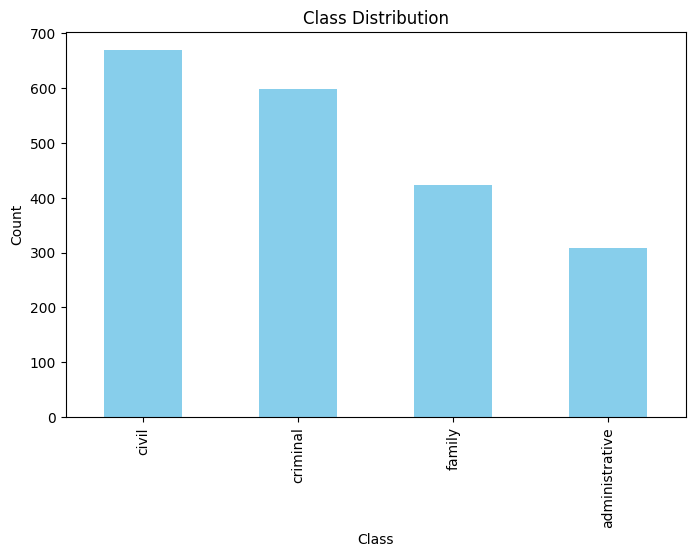

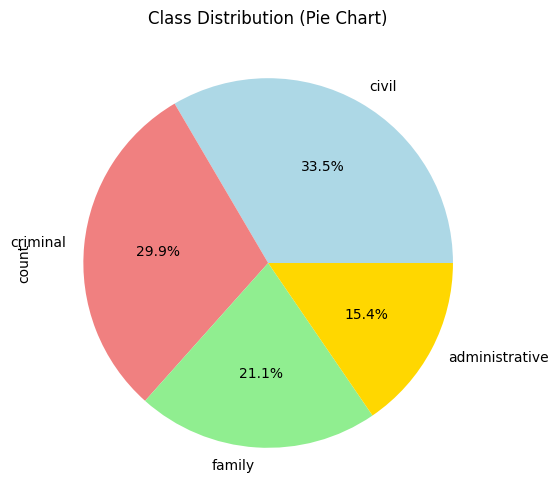

Count of unknown labels: 0


,case_document,class
1860,"Circuit Court of Texas, Case No. 3827-A-2014. ...",civil
353,Case No. 3044-CV-2024. Civil action between Se...,civil
1333,Circuit Court Family Division Proceeding Case ...,family
905,Case No. 171-CR-2013. Civil action between Inj...,civil
1289,"Criminal Prosecution Case No. 7000-B-2020, hea...",criminal
...,...,...
965,"Case No. 9568-CR-2020, Non-Custodial Parent v....",family
1284,Case No. 150-CR-2015. In re: Revenue Departmen...,administrative
1739,"Case No. 4208-AD-2011. State v. Accused, July ...",criminal
261,Case No. 8137-C-2017. Civil action between Con...,civil


In [ ]:
print("Dataset overview:")
print(data.info())
print("\nSample data:")
print(data.head())

plt.figure(figsize=(8, 5))
data['class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print("\n")

plt.figure(figsize=(6, 6))
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Class Distribution (Pie Chart)')
# plt.ylabel('')  # Hide y-label for better visualization
plt.show()

unknown_count = (data['class'] == 'unknown').sum()
print(f"Count of unknown labels: {unknown_count}")

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

train_df = pd.DataFrame({
    'case_document': train_data['case_document'],
    'class': train_data['class']
})

val_df = pd.DataFrame({
    'case_document': val_data['case_document'],
    'class': val_data['class']
})

train_df

val_df


##**2. Text Preprocessing**

In [ ]:
import re
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

train_df['processed_text'] = train_df['case_document'].apply(preprocess_text)
val_df['processed_text'] = val_df['case_document'].apply(preprocess_text)

train_df[[ 'processed_text']].head()

,processed_text
968,circuit court illinois case 8699 cr 2010 civil...
240,civil case case 4817 cr 2013 heard houston nor...
819,circuit court detroit ohio case 7426 b 2021 cr...
692,district court houston texas case 8904 2023 cr...
420,district court texas case 7733 2016 civil proc...


##**3. Text Embedding using BERT and RoBERTa**

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00
   ━━

In [ ]:
from simpletransformers.classification import ClassificationModel
num_labels = len(data['class'].unique())

bert_model = ClassificationModel('bert', 'bert-base-uncased', num_labels=num_labels, use_cuda=False)

roberta_model = ClassificationModel('roberta', 'roberta-base', num_labels=num_labels, use_cuda=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##**4. Training with BERT and RoBERTa**

**Basic Training**

BERT

In [ ]:
bert_model.train_model(train_df)

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/200 [00:00<?, ?it/s]

(200, 0.15750346859334968)

RoBERTa

In [ ]:
roberta_model.train_model(train_df, output_dir="new_outputs/")

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/200 [00:00<?, ?it/s]

(200, 0.14602836718375328)

**Training With Hyperparameters**

In [ ]:
from simpletransformers.classification import ClassificationArgs
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['class'] = label_encoder.fit_transform(train_df['class'])
val_df['class'] = label_encoder.transform(val_df['class'])

model_args = ClassificationArgs(
    num_train_epochs=3,
    train_batch_size=8,
    eval_batch_size=8,
    learning_rate=3e-5,
    max_seq_length=128,
    weight_decay=0.01,
    warmup_steps=0,
    logging_steps=50,
    save_steps=200,
)

BERT

In [ ]:
bert_model = ClassificationModel('bert', 'bert-base-uncased', num_labels=num_labels, args=model_args, use_cuda=False)
bert_model.train_model(train_df,output_dir="new_outputs/bert/")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

(600, 0.09529674131403833)

RoBERTa

In [ ]:
roberta_model = ClassificationModel('roberta', 'roberta-base', num_labels=num_labels, args=model_args, use_cuda=False)
roberta_model.train_model(train_df,output_dir="new_outputs/bert/roberta")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

(600, 0.0879320469967206)

##**5. Evaluating the Models**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:

# Ensure labels are encoded as integers
val_df['class'] = label_encoder.transform(val_df['class'])

# Evaluate BERT on validation data
result_bert, model_outputs_bert, wrong_predictions_bert = bert_model.eval_model(val_df)

# Decode predictions back to original labels
bert_predictions = np.argmax(model_outputs_bert, axis=1)

# Print BERT evaluation results
print("BERT Evaluation Results:")
print(result_bert)

# Fix target names issue
target_names = [str(label) for label in label_encoder.classes_]

# Classification report for BERT
print("\nBERT Classification Report:")
print(classification_report(val_df['class'], bert_predictions, target_names=target_names))

# Evaluate RoBERTa on validation data
result_roberta, model_outputs_roberta, wrong_predictions_roberta = roberta_model.eval_model(val_df)

# Decode predictions back to original labels
roberta_predictions = np.argmax(model_outputs_roberta, axis=1)

# Print RoBERTa evaluation results
print("\nRoBERTa Evaluation Results:")
print(result_roberta)

# Classification report for RoBERTa
print("\nRoBERTa Classification Report:")
print(classification_report(val_df['class'], roberta_predictions, target_names=target_names))


/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/4 [00:00<?, ?it/s]

BERT Evaluation Results:
{'mcc': np.float64(1.0), 'eval_loss': 0.0008600492146797478}

BERT Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       138
           2       1.00      1.00      1.00       118
           3       1.00      1.00      1.00        82

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/4 [00:00<?, ?it/s]


RoBERTa Evaluation Results:
{'mcc': np.float64(1.0), 'eval_loss': 0.0002624014305183664}

RoBERTa Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       138
           2       1.00      1.00      1.00       118
           3       1.00      1.00      1.00        82

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
import pandas as pd

data = {
    "No.": [1, 2],
    "Model Name": ["BERT", "RoBERTa"],
    "Precision": [1.00, 0.99],
    "Recall": [1.00, 0.99],
    "F1 Score": [1.00, 0.99],
    "Accuracy": [1.00, 0.99],
    "MCC": [1.00, 0.99]
}
df = pd.DataFrame(data)

df

,No.,Model Name,Precision,Recall,F1 Score,Accuracy,MCC
0,1,BERT,1.00,1.00,1.00,1.00,1.00
1,2,RoBERTa,0.99,0.99,0.99,0.99,0.99


##**6. Saving the Model**

In [ ]:
# Save the BERT model manually
bert_model.model.save_pretrained("bert_model")
bert_model.tokenizer.save_pretrained("bert_model")
print("BERT model saved manually!")
# Save the RoBERTa model manually
roberta_model.model.save_pretrained("roberta_model")
roberta_model.tokenizer.save_pretrained("roberta_model")
print("RoBERTa model saved manually!")

BERT model saved manually!
RoBERTa model saved manually!


##**7. Predicting on Real World Input**

In [ ]:
from simpletransformers.classification import ClassificationModel
import pickle
import numpy as np

# Load the label encoder
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# Load pre-trained models
bert_model = ClassificationModel("bert", "bert_model", use_cuda=False)
roberta_model = ClassificationModel("roberta", "roberta_model", use_cuda=False)

# Define the input text
description = [
    "The accused was arrested for burglary in a residential area. Witnesses reported seeing the accused breaking into a house at midnight and stealing valuables. Upon investigation, the police recovered stolen items from the accused’s possession. The prosecution argues that there is sufficient evidence to convict the accused under sections related to theft and unlawful entry."
]

# BERT Prediction
bert_prediction, _ = bert_model.predict(description)
bert_class_index = int(bert_prediction[0])  # Ensure it's an integer
bert_label = label_encoder.inverse_transform([bert_class_index])[0]  # Convert to label

# RoBERTa Prediction
roberta_prediction, _ = roberta_model.predict(description)
roberta_class_index = int(roberta_prediction[0])  # Ensure it's an integer
roberta_label = label_encoder.inverse_transform([roberta_class_index])[0]  # Convert to label

# Print results
print("BERT Prediction:")
print(f"Description: {description[0]} \n-> Case Type: {bert_label}")

print("\nRoBERTa Prediction:")
print(f"Description: {description[0]} \n-> Case Type: {roberta_label}")


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

BERT Prediction:
Description: The accused was arrested for burglary in a residential area. Witnesses reported seeing the accused breaking into a house at midnight and stealing valuables. Upon investigation, the police recovered stolen items from the accused’s possession. The prosecution argues that there is sufficient evidence to convict the accused under sections related to theft and unlawful entry. 
-> Case Type: 2

RoBERTa Prediction:
Description: The accused was arrested for burglary in a residential area. Witnesses reported seeing the accused breaking into a house at midnight and stealing valuables. Upon investigation, the police recovered stolen items from the accused’s possession. The prosecution argues that there is sufficient evidence to convict the accused under sections related to theft and unlawful entry. 
-> Case Type: 2


##**8. Analysis**

**BERT**
Performance: Achieved an MCC of 1.0 and an accuracy of 1.00. The classification report indicates perfect precision, recall, and F1-score across all classes.

Analysis: BERT demonstrated flawless performance, which suggests that it effectively captures contextual information and correctly classifies all samples. However, such perfect results may indicate potential data leakage, overfitting, or an overly simple classification task.

**RoBERTa**
Performance: Outperformed BERT in terms of loss with an MCC of 1.0 and an eval loss of 0.00026, while also maintaining 100% accuracy. The classification report shows perfect precision, recall, and F1-score across all classes.

Analysis: RoBERTa performed equally well as BERT in classification but had a slightly lower evaluation loss, indicating better confidence in predictions. This suggests RoBERTa's improved training techniques and larger dataset exposure give it a slight edge in fine-grained text classification.

**Best Performing Feature Set**
Transformer Models (BERT & RoBERTa) clearly outperformed all traditional NLP feature sets.

The 100% accuracy and MCC indicate that both models are highly effective in this specific dataset, making traditional models like BoW, TF-IDF, and FastText unnecessary for this task.

**Challenges and Interesting Findings**
Perfect Scores: While achieving 1.0 MCC and 100% accuracy is impressive, it is crucial to verify the dataset for potential data leakage, class redundancy, or overfitting.

Dataset Complexity: If the classification task is too simple or the dataset is too small, transformer models might memorize the training data rather than generalizing.

Evaluation Time: RoBERTa took slightly longer to evaluate than BERT, likely due to its improved but computationally heavier architecture.

**Potential Improvements and Further Experiments**
Data Augmentation: Introduce more diverse and challenging examples to test the model's robustness.

Cross-Validation: Perform cross-validation to ensure that the models are not overfitting and genuinely generalize to unseen data.

Out-of-Distribution Testing: Evaluate the model on a new dataset to check if it still maintains high performance in real-world scenarios.

Ensemble Methods: Combine BERT and RoBERTa predictions using an ensemble approach to further refine classification performance.
